In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-10-08 19:04:29--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.009s  

2025-10-08 19:04:29 (90.1 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [17]:
string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower()

In [18]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,europe,gasoline,all-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,usa,gasoline,front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,europe,gasoline,front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,usa,diesel,all-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,europe,gasoline,all-wheel drive,2.0,12.488369


In [23]:
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']
df_base = df[base]

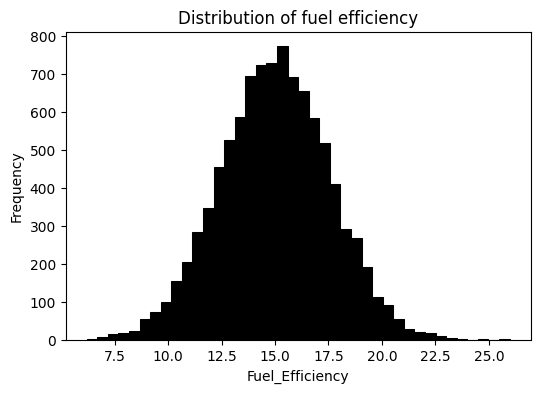

In [21]:
plt.figure(figsize=(6, 4))

sns.histplot(df.fuel_efficiency_mpg, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Fuel_Efficiency')
plt.title('Distribution of fuel efficiency')

plt.show()

In [24]:
# Q1
df_base.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [25]:
# Q2
df_base.horsepower.median()

np.float64(149.0)

In [28]:
n = len(df_base)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df_base.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train + n_val:].copy()

In [ ]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

array([17.92797922, 17.20002754, 18.11769736, ..., 14.37017385,
       16.97739   , 12.31728179], shape=(5824,))

In [30]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [31]:
def prepare_X(df, b):
    if b == 0:
        df = df.fillna(0)
    else:
        df = df.fillna(b)
    X = df.values
    return X


In [32]:
X_train_opt1 = prepare_X(df_train, 0)
w_0_opt1, w_opt1 = train_linear_regression(X_train_opt1, y_train)

In [34]:
horsepower_mean =  df_train.horsepower.mean()
X_train_opt2 = prepare_X(df_train, horsepower_mean)
w_0_opt2, w_opt2 = train_linear_regression(X_train_opt2, y_train)

In [35]:
y_pred_opt1 = w_0_opt1 + X_train_opt1.dot(w_opt1)
y_pred_opt2 = w_0_opt2 + X_train_opt2.dot(w_opt2)


<Axes: ylabel='Count'>

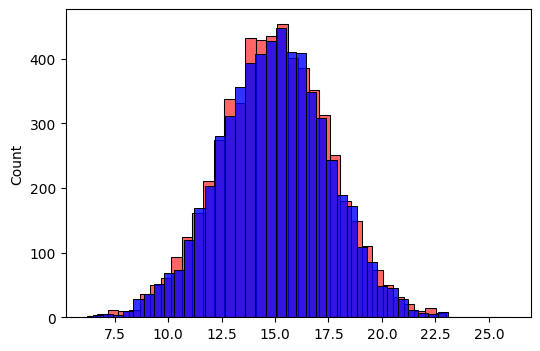

In [39]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='red', alpha=0.6, bins=40)
sns.histplot(y_pred_opt1, label='prediction', color='blue', alpha=0.8, bins=40)

<Axes: ylabel='Count'>

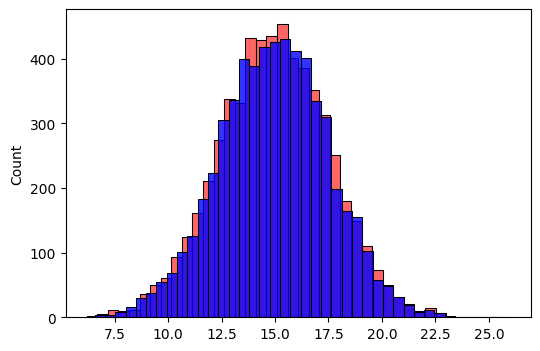

In [40]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='red', alpha=0.6, bins=40)
sns.histplot(y_pred_opt2, label='prediction', color='blue', alpha=0.8, bins=40)

In [41]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [42]:
rmse(y_train, y_pred_opt1)


np.float64(0.5184874225392957)

In [43]:
rmse(y_train, y_pred_opt2)


np.float64(0.4605406195761729)

In [44]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [ ]:
X_train = prepare_X(df_train, 0)

In [56]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[2], w[3]))

    0, 26.05, -0.01, 0.00
 0.01, 22.53, -0.01, 0.00
  0.1, 10.17, -0.01, 0.01
    1, 1.57, -0.01, 0.01
    5, 0.33, -0.01, 0.01
   10, 0.17, -0.01, 0.01
  100, 0.02, -0.01, 0.01


In [60]:
X_train = prepare_X(df_train, 0)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val, 0)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 0.5184874225392957
val 0.5239251328414641
